In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
import scipy.stats as sps
import pandas as pd
import cupy as cp
from scipy.stats import norm, chi2
from datetime import datetime
%matplotlib widget

# Plotting format for thesis
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', titlesize=16, labelsize=16)
plt.rc('legend', fontsize=14)
plt.rc('figure', titlesize=18)

The form of the function is: V(t) = a * exp(-b * t) + c
Parameter a: 0.514 [V]
Parameter b: 0.093 [1/Hour]
Parameter c: 10.919 [V]


/home/dradmin/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


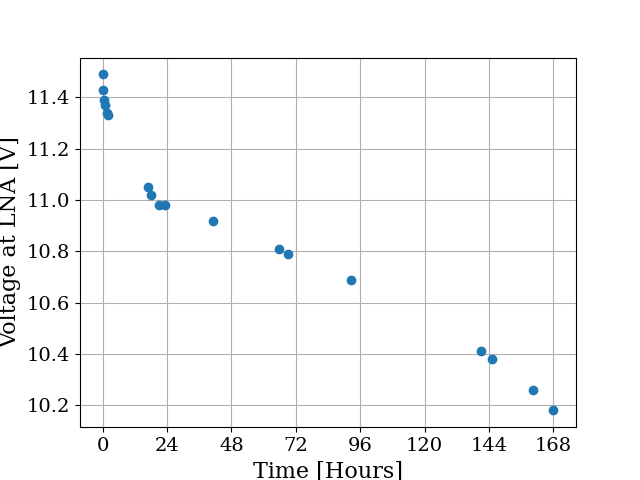

In [8]:
# battery voltage vs time plot

# Load the data from the .ods file
file_path = 'batteryVoltage.ods'  # Replace with the actual file path
data = pd.read_excel(file_path, engine='odf')

# Specify the start date and time
start_datetime = datetime.strptime('15 17:07', '%d %H:%M')

# Function to convert day and time to hours since start
def convert_to_hours_since_start(row):
    current_datetime = datetime.strptime(f"{int(row['Day'])} {int(row['Hour'])} {int(row['Minute'])}", '%d %H %M')
    delta = current_datetime - start_datetime
    return delta.total_seconds() / 3600

# Apply the function to create a new column for hours since start
data['Hours_Since_Start'] = data.apply(convert_to_hours_since_start, axis=1)


# Define the exponential function for fitting
def exponential_fit(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the exponential function to the data
params, covariance = curve_fit(exponential_fit, data['Hours_Since_Start'][:11], data['Voltage'][:11], p0=[1, 20, 11])

# Print the form of the function and the parameters rounded to 3 decimal places
print("The form of the function is: V(t) = a * exp(-b * t) + c")
print(f"Parameter a: {params[0]:.3f} [V]")
print(f"Parameter b: {params[1]:.3f} [1/Hour]")
print(f"Parameter c: {params[2]:.3f} [V]")

 

# Generate data points for the fitted curve
fit_x = np.linspace(0, max(data['Hours_Since_Start']), 100)
fit_y = exponential_fit(fit_x, *params)

# Plot the data and the fit
plt.figure()
plt.plot(data['Hours_Since_Start'][:-1], data['Voltage'][:-1], 'o', label='Data')
#plt.plot(fit_x, fit_y, '-', label='Exponential Fit')
plt.xlabel('Time [Hours]')
plt.ylabel('Voltage at LNA [V]')
numDays = 7
ytick = plt.xticks([i * 24 for i in range(numDays+1)])
plt.xlim(-(numDays*24/20), (numDays*24*1.05))
#plt.legend()
plt.grid(True)
plt.show()
plt.tight_layout()

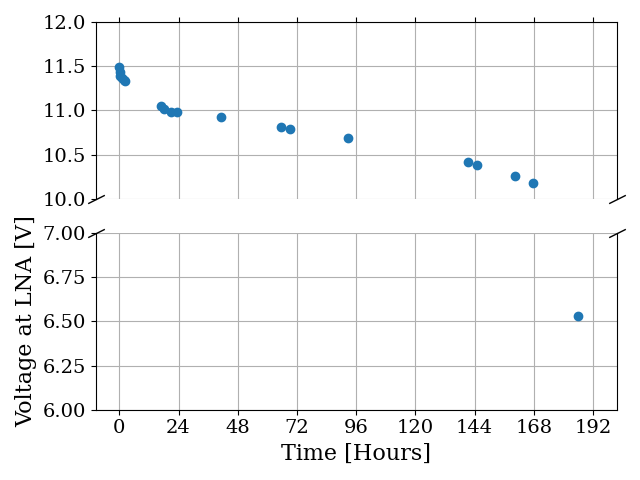

In [5]:
import matplotlib.pyplot as plt

# Assume data is already defined and your code runs successfully
# data['Hours_Since_Start'] and data['Voltage']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between Axes

# Plot the data on both Axes
ax1.plot(data['Hours_Since_Start'], data['Voltage'], 'o', label='Data')
ax2.plot(data['Hours_Since_Start'], data['Voltage'], 'o', label='Data')

# Zoom-in / limit the view to different portions of the data
ax1.set_ylim(10,12)  # upper portion
ax2.set_ylim(6, 7)  # lower portion

# Hide the spines between ax1 and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Add the cut-out slanted lines
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# Set x-axis labels
plt.xlabel('Time [Hours]')
plt.ylabel('Voltage at LNA [V]')

# Adjust x-ticks as per your original code
numDays = 8
plt.xticks([i * 24 for i in range(numDays+1)])
plt.xlim(-(numDays*24/20), (numDays*24*1.05))

plt.grid(True)
ax1.grid()
plt.tight_layout()
plt.show()